In [3]:
import numpy as np
import pandas as pd 

import warnings 
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt


import seaborn as sns
sns.set()

%config inlineBackend.figure_format = 'svg'

In [4]:
pwd()

'/Users/Igor/Desktop/MICourse'

In [5]:
cd data/

/Users/Igor/Desktop/MICourse/data


In [7]:
df = pd.read_csv('telecom_churn.csv', sep = ',')

In [8]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [9]:
features= ['Total day minutes', 'Total intl calls']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b4fe5c0>,
      dtype=object)

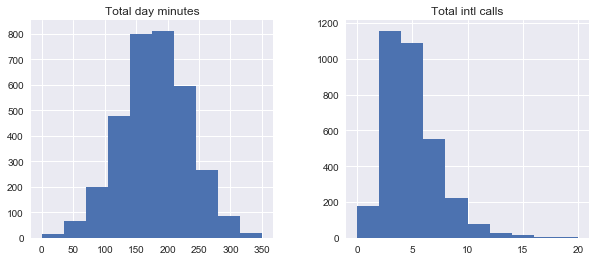

In [10]:
df[features].hist(figsize = (10,4))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105aeb748>,
      dtype=object)

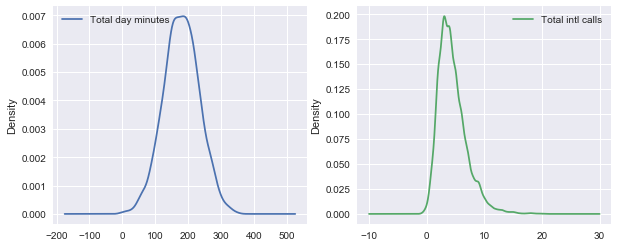

In [14]:
df[features].plot(kind = 'density', subplots = True, layout = (1,2),sharex= False, figsize = (10,4))

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


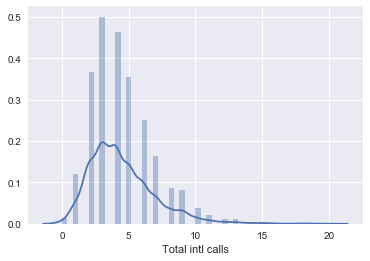

In [15]:
sns.distplot(df['Total intl calls'])

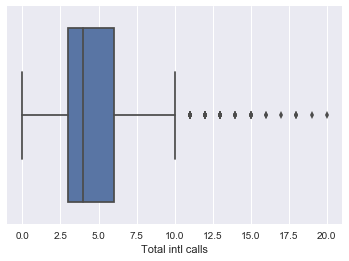

In [16]:
sns.boxplot(x = 'Total intl calls', data = df)

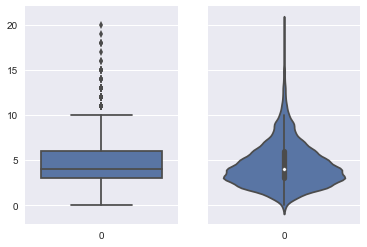

In [32]:
_, axes = plt.subplots(1,2, sharey= True, figsize = (6,4))
sns.boxplot(data= df['Total intl calls'], ax= axes[0])
sns.violinplot(data= df['Total intl calls'], ax= axes[1])

In [34]:
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

In [36]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

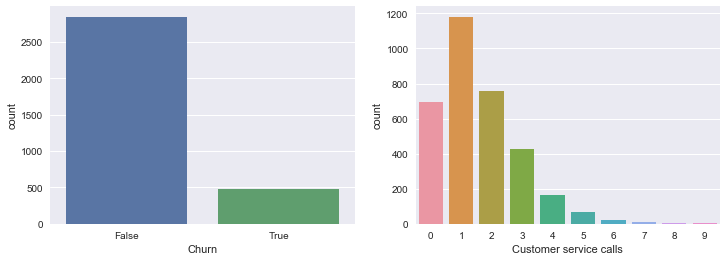

In [48]:
_, axes = plt.subplots(nrows= 1, ncols = 2, figsize = (12,4))
sns.countplot(x = 'Churn', data= df, ax= axes[0])
sns.countplot(x = 'Customer service calls', data = df, ax = axes [1])

In [49]:
numerical = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

In [50]:
corr_matrix = df[numerical].corr()

In [51]:
corr_matrix

Total eve calls  Total intl calls  Total day minutes  \
Total eve calls               1.000000          0.017434           0.015769   
Total intl calls              0.017434          1.000000           0.008033   
Total day minutes             0.015769          0.008033           1.000000   
Total night calls             0.007710          0.000305           0.022972   
Number vmail messages        -0.005864          0.013957           0.000778   
Account length                0.019260          0.020661           0.006216   
Total eve minutes            -0.011430          0.002541           0.007043   
Total night minutes          -0.002093         -0.012353           0.004323   
Total day calls               0.006462          0.004574           0.006750   
Total eve charge             -0.011423          0.002541           0.007029   
Total intl minutes            0.008703          0.032304          -0.010155   
Total intl charge             0.008674          0.032372          -0.010092   
Total night charge           -0.002056         -0.012329           0.004300   
Total day charge              0.015769          0.008032           1.000000   

                       Total night calls  Number vmail messages  \
Total eve calls                 0.007710              -0.005864   
Total intl calls                0.000305               0.013957   
Total day minutes               0.022972               0.000778   
Total night calls               1.000000               0.007123   
Number vmail messages           0.007123               1.000000   
Account length                 -0.013176              -0.004628   
Total eve minutes               0.007586               0.017562   
Total night minutes             0.011204               0.007681   
Total day calls                -0.019557              -0.009548   
Total eve charge                0.007596               0.017578   
Total intl minutes             -0.013605               0.002856   
Total intl charge              -0.013630               0.002884   
Total night charge              0.011188               0.007663   
Total day charge                0.022972               0.000776   

                       Account length  Total eve minutes  Total night minutes  \
Total eve calls              0.019260          -0.011430            -0.002093   
Total intl calls             0.020661           0.002541            -0.012353   
Total day minutes            0.006216           0.007043             0.004323   
Total night calls           -0.013176           0.007586             0.011204   
Number vmail messages       -0.004628           0.017562             0.007681   
Account length               1.000000          -0.006757            -0.008955   
Total eve minutes           -0.006757           1.000000            -0.012584   
Total night minutes         -0.008955          -0.012584             1.000000   
Total day calls              0.038470          -0.021451             0.022938   
Total eve charge            -0.006745           1.000000            -0.012592   
Total intl minutes           0.009514          -0.011035            -0.015207   
Total intl charge            0.009546          -0.011067            -0.015180   
Total night charge          -0.008960          -0.012593             0.999999   
Total day charge             0.006214           0.007050             0.004324   

                       Total day calls  Total eve charge  Total intl minutes  \
Total eve calls               0.006462         -0.011423            0.008703   
Total intl calls              0.004574          0.002541            0.032304   
Total day minutes             0.006750          0.007029           -0.010155   
Total night calls            -0.019557          0.007596           -0.013605   
Number vmail messages        -0.009548          0.017578            0.002856   
Account length                0.038470         -0.006745            0.009514   
Total eve minutes            -0.021451          1.00000

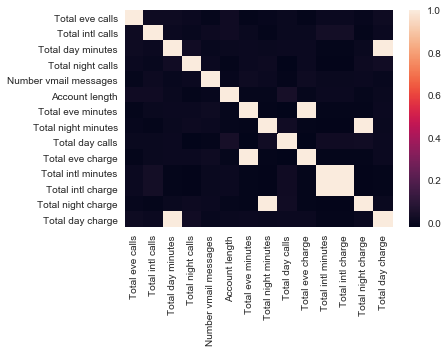

In [53]:
sns.heatmap(corr_matrix)

In [54]:
numerical = list(set(numerical)- set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

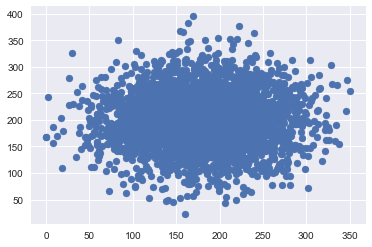

In [55]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


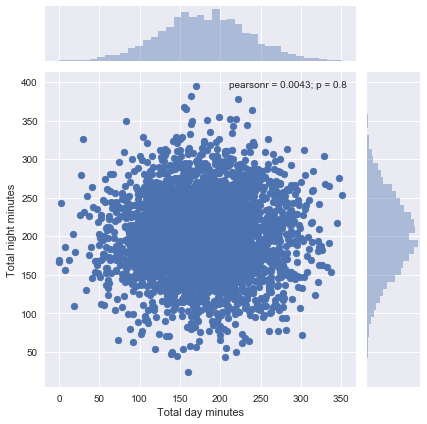

In [58]:
sns.jointplot(x = 'Total day minutes', y = 'Total night minutes', data= df, kind = 'scatter')

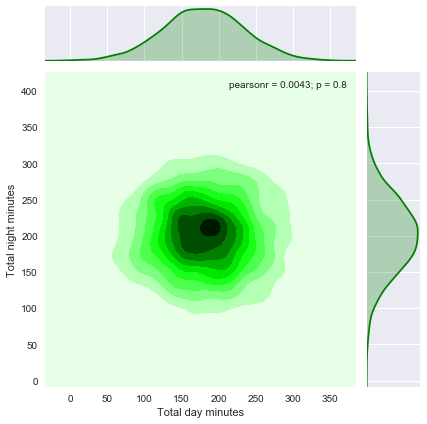

In [59]:
sns.jointplot('Total day minutes', 'Total night minutes', data = df, kind = 'kde', color = 'g')

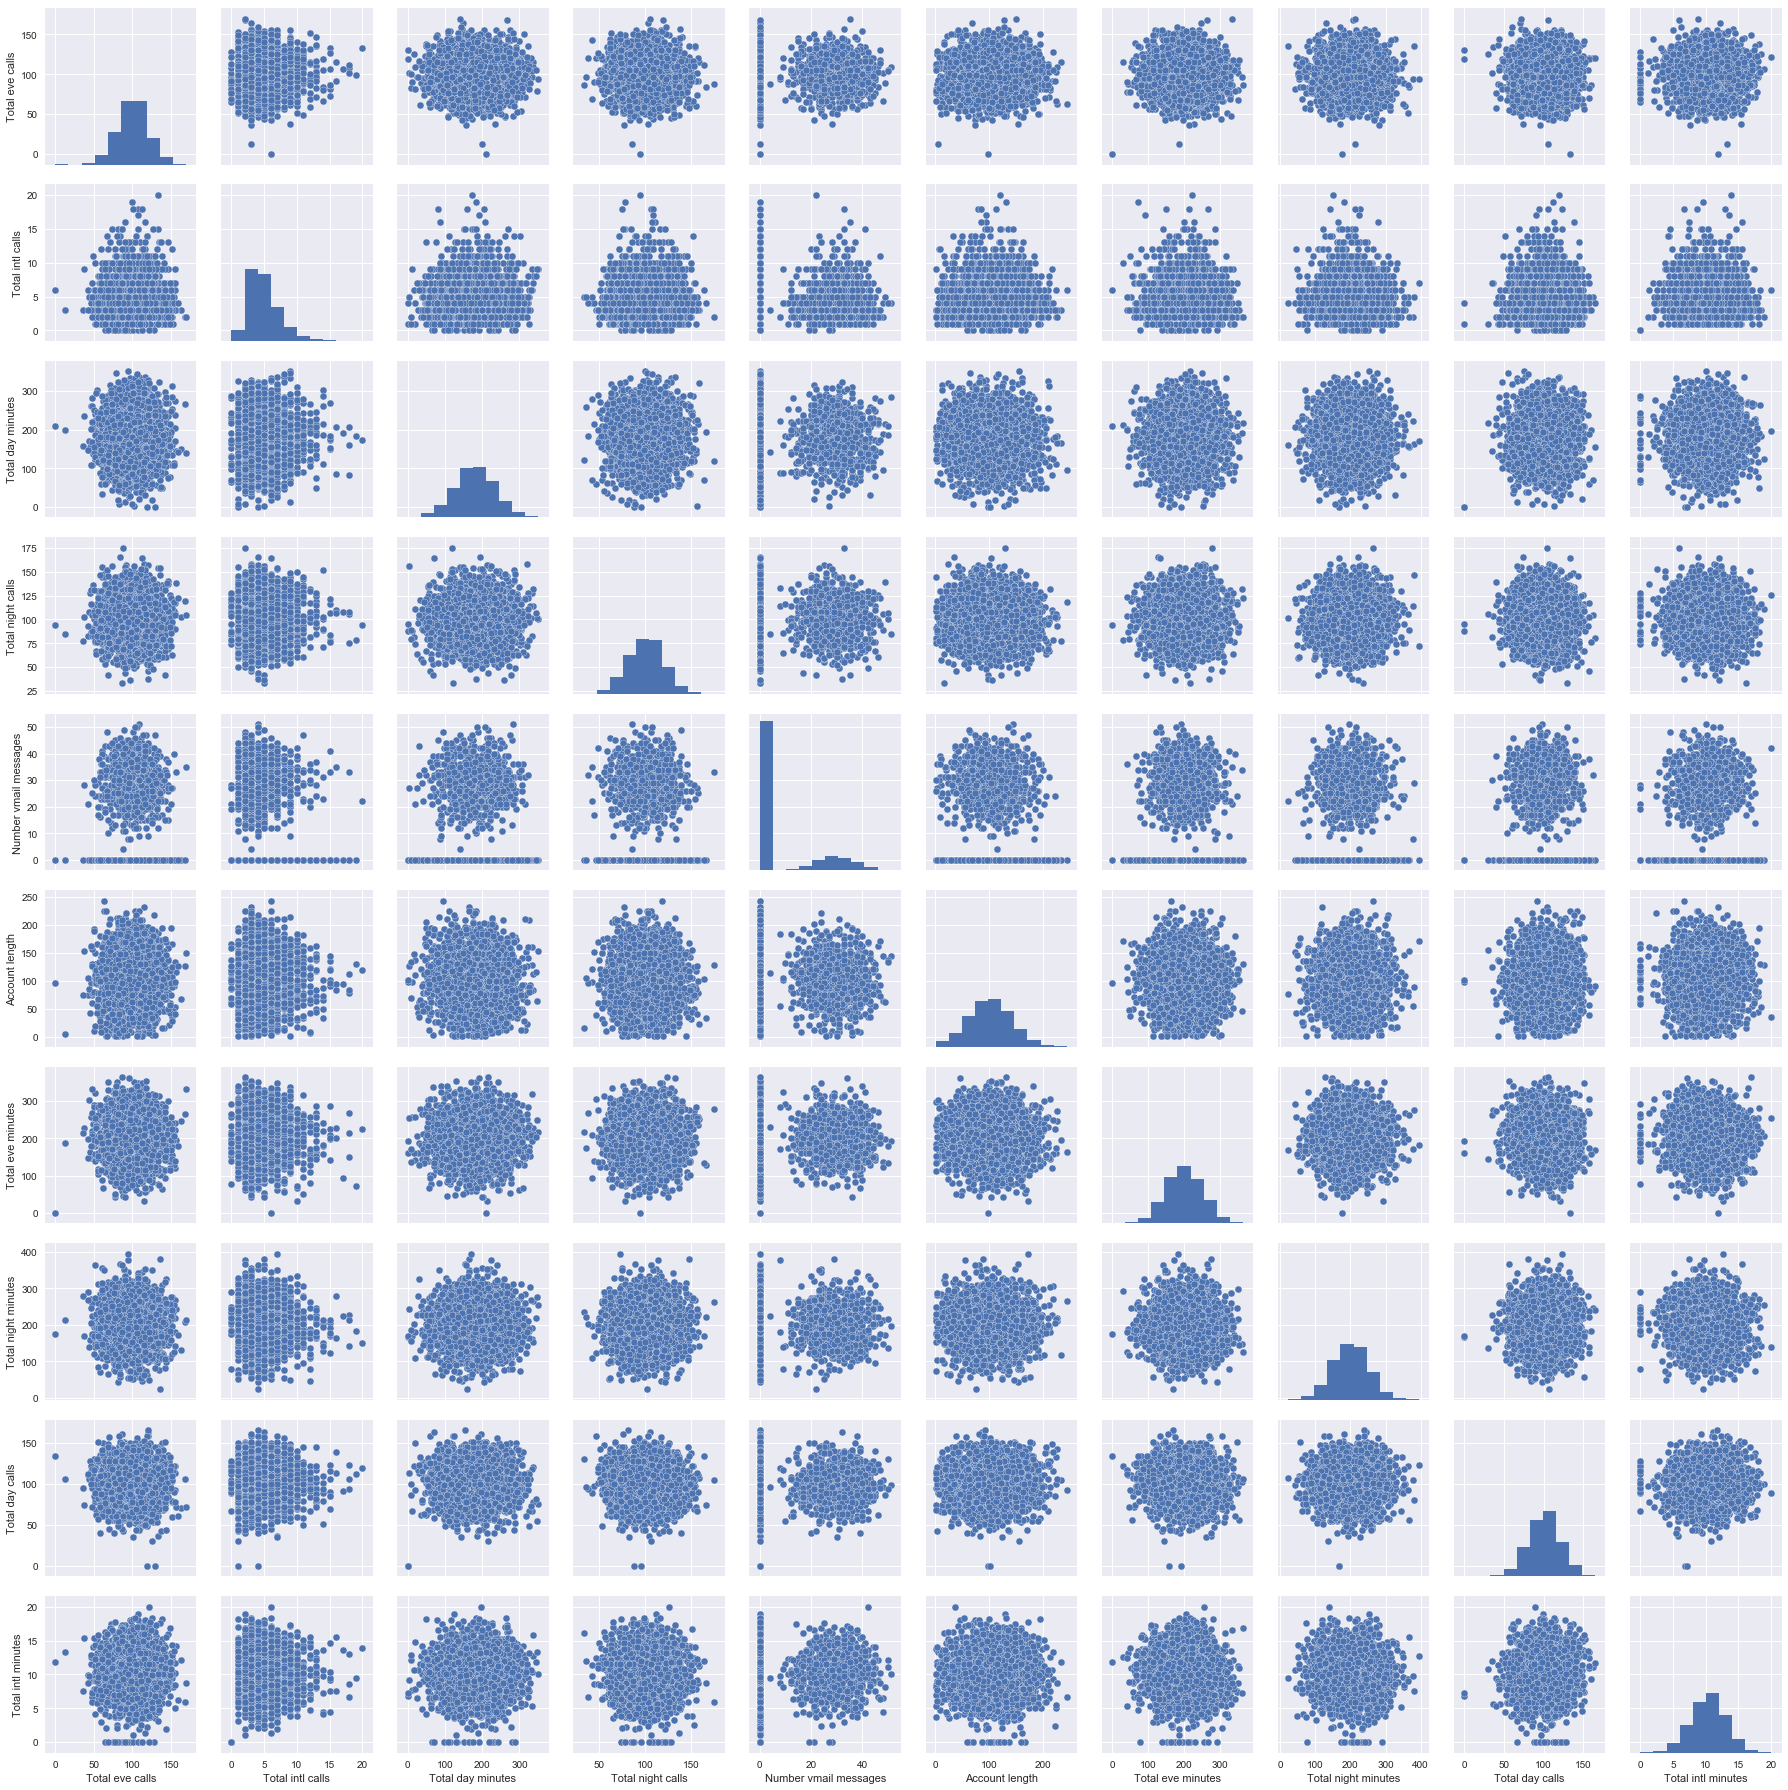

In [60]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical])

In [61]:
%config InlineBackend.figure_format = 'svg'

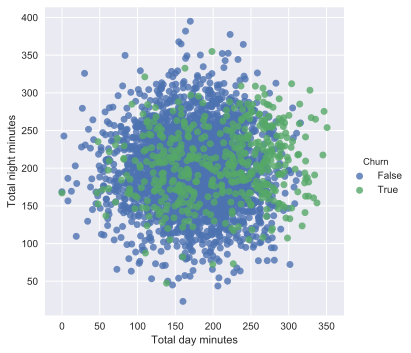

In [62]:
sns.lmplot('Total day minutes', 'Total night minutes', data = df, hue = 'Churn', fit_reg=False)

IndexError: index 3 is out of bounds for axis 0 with size 3

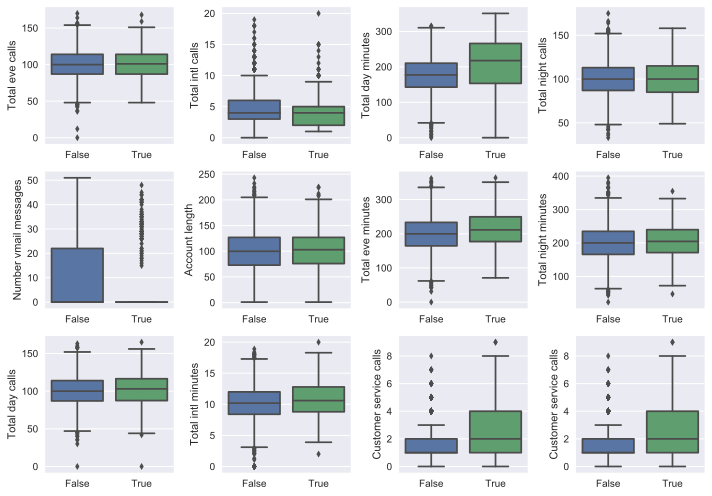

In [72]:
numerical.append('Customer service calls')
fig, axes =plt.subplots(nrows=3, ncols= 4, figsize = (10,7))
for idx, feat in enumerate(numerical):
    ax=axes[int(idx / 4), idx % 4]
    sns.boxplot(x = 'Churn', y = feat, data= df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
    fig.tight_layout()

IndexError: index 3 is out of bounds for axis 0 with size 3

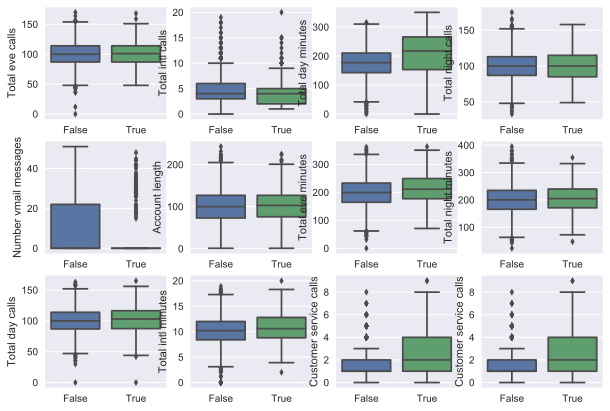

In [71]:
# Sometimes you can analyze an ordinal variable just as numerical one
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

SyntaxError: positional argument follows keyword argument (<ipython-input-65-96f080a41749>, line 1)

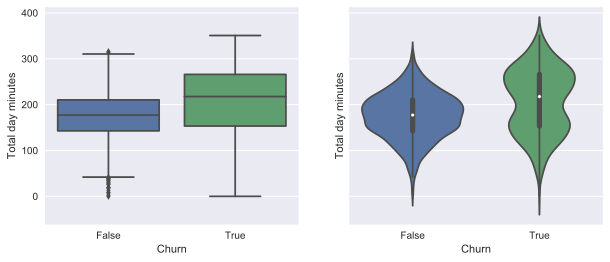

In [74]:
_, axes = plt.subplots(1,2, sharey = True, figsize = (10,4))

sns.boxplot(x = 'Churn', y = 'Total day minutes', data= df, ax=axes[0]);
sns.violinplot(x = 'Churn', y = 'Total day minutes', data = df, ax = axes[1]);

In [80]:
sns.catplot(x = 'Churn', y = 'Total day minutes', col = 'Customer service calls', data = df[df['Customer service calls']<8], 
           kind = 'box', col_wrap = 4, height =3, aspect = .8)

AttributeError: module 'seaborn' has no attribute 'catplot'

In [79]:
import seaborn as sns

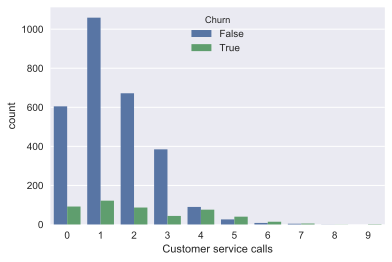

In [82]:
sns.countplot(x= 'Customer service calls', hue = 'Churn', data= df)

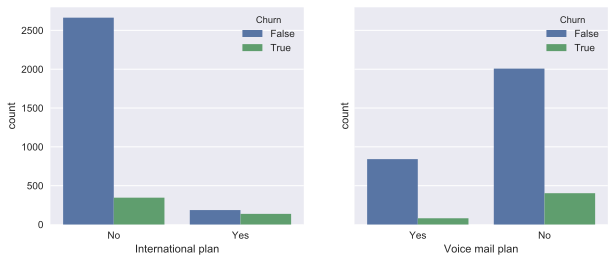

In [83]:
_, axes = plt.subplots(1,2,sharey = True, figsize=(10,4))

sns.countplot(x = 'International plan', hue = 'Churn', data = df, ax=axes[0]);
sns.countplot(x = 'Voice mail plan', hue = 'Churn', data = df, ax=axes[1])

In [86]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL ...  SD  TN  TX  UT  VA  VT  WA  \
Churn                                         ...                               
False  49  72  44  60  25  57  62  49  52  55 ...  52  48  54  62  72  65  52   
True    3   8  11   4   9   9  12   5   9   8 ...   8   5  18  10   5   8  14   

State  WI  WV  WY  
Churn              
False  71  96  68  
True    7  10   9  

[2 rows x 51 columns]

In [87]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by = 'mean', ascending = False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME    ...           RI        WI        IL  \
mean   0.212121  0.212121  0.209677    ...     0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

In [104]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [90]:
X = df.drop(['Churn', 'State'], axis = 1) 

In [92]:
X.head()

Account length  Area code International plan Voice mail plan  \
0             128        415                 No             Yes   
1             107        415                 No             Yes   
2             137        415                 No              No   
3              84        408                Yes              No   
4              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  
0                       1  
1                       1  
2                       0  
3                       2  
4                       3

In [93]:
X['International plan']= X['International plan'].map({'Yes':1, 'No':0})

In [100]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

In [101]:
scaler = StandardScaler()

In [102]:
X_scaled = scaler.fit_transform(X)

In [103]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

CPU times: user 2min 3s, sys: 12 s, total: 2min 15s
Wall time: 2min 17s


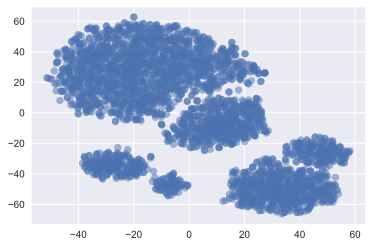

In [106]:
plt.scatter(tsne_repr[:,0], tsne_repr[:,1], alpha=.5)

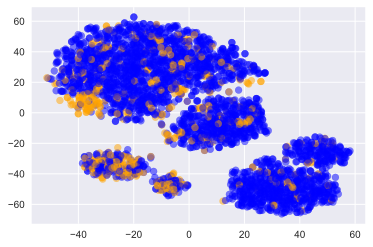

In [107]:
plt.scatter(tsne_repr[:,0], tsne_repr[:,1],c = df['Churn'].map({False : 'blue', True: 'orange'}), alpha=.5)

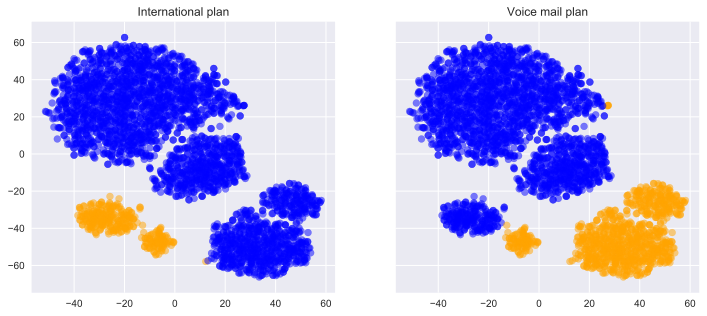

In [108]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);